# Genre Movie Analysis:

Hypothesis: There is a relationship between genre and budget, revenue, profit, and profit margin.

Questions we asked in our analysis:

Which genres have the most movies in the sample? Which genres have the highest production budgets? Which genres have the lowest production budgets? Which genres are the most profitable? Which genres are the least profitable?

Answering these questions give the interested producer insight into movie profitability. 

In [1]:
import pandas as pd
from pprint import pprint
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import matplotlib.ticker as mtick
low_memory=False

In [2]:
# read tsv files from TMDB

# tsv_file_1 = "Resources/movies.tsv"
# tsv_file_2 = "Resources/movies_financial.tsv"
# tsv_table_1=pd.read_table(tsv_file_1,sep=""\t")
# tsv_table_2=pd.read_table(tsv_file_2,sep=""\t")
# Convert to csv files
# tsv_table_1.to_csv("Resources/movies_data.csv",index=False)
# tsv_table_2.to_csv("Resources/movies_fin_data.csv", index=False)

In [3]:
# Load movie data from the 1st csv file

load_movies_data= "Resources/movies_data.csv"
movies_data = pd.read_csv(load_movies_data)

movies_data



,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [4]:
# load the 2nd csv file

load_movie_fin_data = "Resources/movies_financial.csv"
movie_fin_data = pd.read_csv(load_movie_fin_data)

movie_fin_data

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code
0,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,13000000,25682380.0,42195766.0,1.0,1.0
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,45658735,13611086.0,41467257.0,1.0,1.0
2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,20000000,53107035.0,158607035.0,1.0,1.0
3,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000,75612460.0,132493015.0,2013FAIL,61000000,75612460.0,132493015.0,1.0,1.0
4,2013,tt0453562,42,men,men,FAIL,40000000,95020213.0,95020213.0,2013FAIL,40000000,95020213.0,95020213.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,1971,tt0067741,Shaft,notalk,notalk,FAIL,53012938,70327868.0,107190108.0,1971FAIL,305063707,404702718.0,616827003.0,NaN,NaN
1790,1971,tt0067800,Straw Dogs,notalk,notalk,FAIL,25000000,10324441.0,11253821.0,1971FAIL,143862856,59412143.0,64760273.0,NaN,NaN
1791,1971,tt0067116,The French Connection,notalk,notalk,FAIL,2200000,41158757.0,41158757.0,1971FAIL,12659931,236848653.0,236848653.0,NaN,NaN
1792,1971,tt0067992,Willy Wonka &amp; the Chocolate Factory,men-disagree,men,FAIL,3000000,4000000.0,4000000.0,1971FAIL,17263543,23018057.0,23018057.0,NaN,NaN


In [5]:
# Combine our datasets

movie_data_combined = pd.merge(movies_data, movie_fin_data, on="title", how="inner")
movie_data_combined.head()


,star_rating,title,content_rating,genre,duration,actors_list,year,imdb,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",1994,tt0111161,nowomen-disagree,nowomen,FAIL,25000000,28241469.0,2.824147e+07,1994FAIL,39291617,44386120.0,4.438612e+07,5.0,3.0
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",1972,tt0068646,notalk-disagree,notalk,FAIL,7000000,134966411.0,2.685000e+08,1972FAIL,39004975,752051643.0,1.496119e+09,NaN,NaN
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",1974,tt0071562,ok,ok,PASS,13000000,57300000.0,5.730000e+07,1974PASS,61408439,270669505.0,2.706695e+08,NaN,NaN
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",2008,tt0468569,dubious-disagree,dubious,FAIL,185000000,533345358.0,1.002891e+09,2008FAIL,200217418,577216380.0,1.085386e+09,2.0,2.0
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",1994,tt0110912,ok-disagree,ok,PASS,8000000,107928762.0,2.129288e+08,1994PASS,12573318,169627825.0,3.346526e+08,5.0,3.0


In [6]:
# create a concise dataframe to conduct analysis on and this will be our main data table

movies_df = movie_data_combined.loc[:,["title", "year", "genre", "star_rating", "budget", "domgross", "intgross"]]
movies_df

,title,year,genre,star_rating,budget,domgross,intgross
0,The Shawshank Redemption,1994,Crime,9.3,25000000,28241469.0,2.824147e+07
1,The Godfather,1972,Crime,9.2,7000000,134966411.0,2.685000e+08
2,The Godfather: Part II,1974,Crime,9.1,13000000,57300000.0,5.730000e+07
3,The Dark Knight,2008,Action,9.0,185000000,533345358.0,1.002891e+09
4,Pulp Fiction,1994,Crime,8.9,8000000,107928762.0,2.129288e+08
...,...,...,...,...,...,...,...
403,Blue Valentine,2010,Drama,7.4,1000000,9737892.0,1.656624e+07
404,Tootsie,1982,Comedy,7.4,15000000,177200000.0,1.772000e+08
405,Back to the Future Part III,1990,Adventure,7.4,40000000,87666629.0,2.437000e+08
406,Master and Commander: The Far Side of the World,2003,Action,7.4,135000000,93926386.0,2.129121e+08


In [7]:
# Count movies per genre

genre_count = movies_df["genre"].value_counts()
genre_count


Drama        115
Action        67
Comedy        54
Crime         43
Adventure     41
Animation     32
Biography     30
Horror        13
Mystery        6
Sci-Fi         5
Western        2
Name: genre, dtype: int64

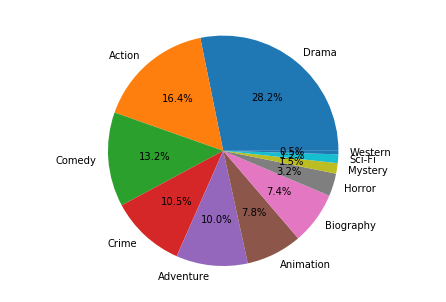

In [8]:
# find movie percentage per genre and visualize

explode1 = [0.5,0.5,0.5]
explode2 = [x * 0 + 1.0 for x in range(7)]
explode3 = [x * 0 + 2.3 for x in range(8)]
explode4 = explode1 + explode2 + explode3
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(genre_count, labels = genre_count.index,autopct='%1.1f%%')

plt.show()

# The above pie chart shows that Drama has most movies, followed by Action and Comedy.  This analysis tells you that producer produce more Drama movies, let's see what the financial data analysis recommends to producers.

In [9]:
# group by genre

genre_movie_grouping = movies_df.groupby("genre").mean().astype(int)

# perform calculations to determine revenue and profit margin

genre_movie_grouping["revenue"] = genre_movie_grouping["domgross"] + genre_movie_grouping["intgross"]
genre_movie_grouping["profit"] = genre_movie_grouping["revenue"] - genre_movie_grouping["budget"]
genre_movie_grouping["profit_margin"] = round((genre_movie_grouping["profit"] / genre_movie_grouping["revenue"]) *100, 1)
genre_movie_grouping = genre_movie_grouping.sort_values("profit_margin", ascending=False)

genre_movie_grouping


,year,star_rating,budget,domgross,intgross,revenue,profit,profit_margin
genre,,,,,,,,
Horror,1990,7,11962692,73804065,136621881,210425946,198463254,94.3
Comedy,1997,7,14472722,63659115,98027055,161686170,147213448,91.0
Adventure,2002,7,81790243,161678777,430308268,591987045,510196802,86.2
Animation,2003,7,104409375,220650052,536894801,757544853,653135478,86.2
Drama,2000,7,28009748,60283913,133774860,194058773,166049025,85.6
Action,1998,7,78132089,151849940,350246663,502096603,423964514,84.4
Sci-Fi,1998,7,49200000,90338383,216179474,306517857,257317857,83.9
Mystery,2004,7,33333333,59849336,140470107,200319443,166986110,83.4
Biography,2002,7,41033333,86288461,148317535,234605996,193572663,82.5


In [10]:
# Display the dataframe to only show financial information

movies_fin_data = genre_movie_grouping.loc[:,["budget", "domgross", "intgross", "profit", "profit_margin"]].reindex()

movies_fin_data

,budget,domgross,intgross,profit,profit_margin
genre,,,,,
Horror,11962692,73804065,136621881,198463254,94.3
Comedy,14472722,63659115,98027055,147213448,91.0
Adventure,81790243,161678777,430308268,510196802,86.2
Animation,104409375,220650052,536894801,653135478,86.2
Drama,28009748,60283913,133774860,166049025,85.6
Action,78132089,151849940,350246663,423964514,84.4
Sci-Fi,49200000,90338383,216179474,257317857,83.9
Mystery,33333333,59849336,140470107,166986110,83.4
Biography,41033333,86288461,148317535,193572663,82.5


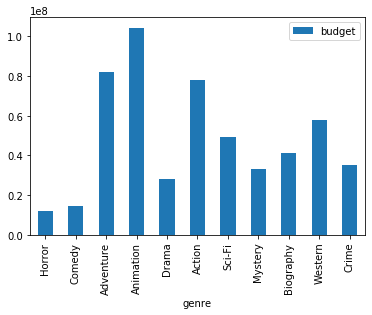

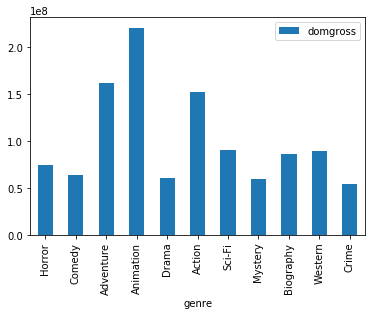

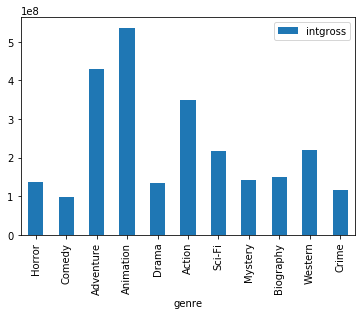

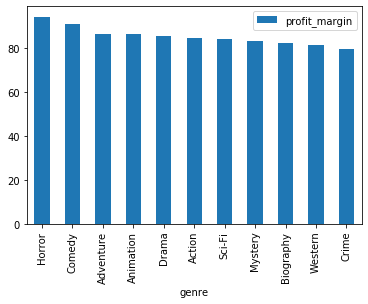

In [11]:
# use graphs to display relationship between genre and budget, intgross and profit margin

plt_2 = movies_fin_data.reset_index().plot.bar(x="genre", y="budget", rot=90)
plt_3 = movies_fin_data.reset_index().plot.bar(x="genre", y="domgross", rot=90)
plt_4 = movies_fin_data.reset_index().plot.bar(x="genre", y="intgross", rot=90)
plt_5 = movies_fin_data.reset_index().plot.bar(x="genre", y="profit_margin", rot=90)

plt.show()

# The above financial analysis could be drawn from the above graphs:

Budget:  Our genre_movie analysis showed that although the Drama genre has most movies, it doesn't have the highest budget.  Animation genre has the highest budget, followed by Adventure and Action.  

Domestic Gross: our budget analysis shows a positive relationship with genre domestic gross. Animation, Adventure and Action are the in the lead domestically. 

International Gross: Animation, Adventure and Action are in the lead internationally as well. 

Profit Margin : Our analysis shows that Horror and Comedy have the highest profit margin. The rest genres are more or less in the same margin. 

The r-squared is: 0.9311079948935421


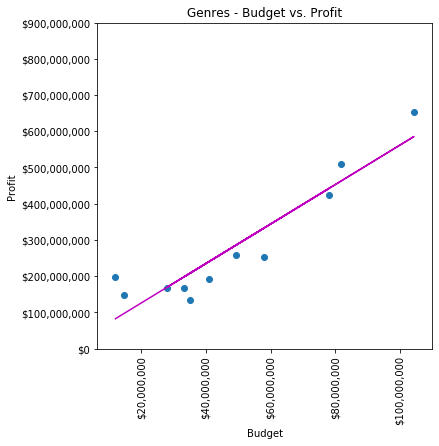

In [25]:
# regression analysis 
x_values = movies_fin_data['budget']
y_values = movies_fin_data['profit']
# conduct a linear regression on budget vs. profit margin
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# get regression values
regress_values = x_values * slope + intercept
# line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# plot
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x_values,regress_values,"m-")
ax.scatter(x_values,y_values)
ax.set_xlabel(f'Budget')
ax.set_ylabel(f'Profit')
ax.set_yticks(np.arange(0,1000000000,100000000))
ax.set_xticklabels(x_values, rotation='vertical')
ax.set_yticklabels(y_values)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.xaxis.set_major_formatter(tick)
ax.set_title(f'Genres - Budget vs. Profit',fontsize=12)
print(f"The r-squared is: {rvalue}")

plt.show()

# the above regression analysis reiterates that there is a positive corelation between budget and profit of movies categorized by genre.

In [26]:
# determine the top rated movies (by star_rating) for each genre
movies_df.sort_values("star_rating", ascending=False).groupby("genre")["title", "star_rating"].first()

,title,star_rating
genre,,
Action,The Dark Knight,9.0
Adventure,The Lord of the Rings: The Return of the King,8.9
Animation,The Lion King,8.5
Biography,Goodfellas,8.7
Comedy,The Sting,8.4
Crime,The Shawshank Redemption,9.3
Drama,Fight Club,8.9
Horror,Alien,8.5
Mystery,Memento,8.5


In [39]:
# calculate average star rating for each genre with at least 10 movies
genres_rating = movies_df["genre"].value_counts()[movies_df["genre"].value_counts() >20].index
movies_df[movies_df["genre"].isin(genres_rating)].groupby("genre")["star_rating"].mean()


genre
Action       7.943284
Adventure    7.919512
Animation    7.903125
Biography    7.853333
Comedy       7.738889
Crime        7.967442
Drama        7.846957
Name: star_rating, dtype: float64

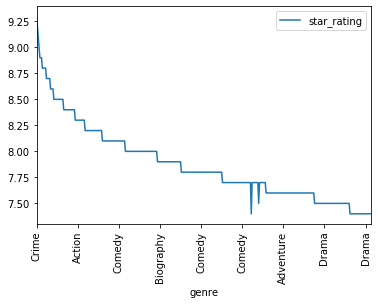

In [47]:
# Display star_rating by genre

plt_1 = movies_df.reset_index().plot.line(x="genre", y="star_rating", rot=90)
plt.show()

The r-squared is: -0.31351407562837086


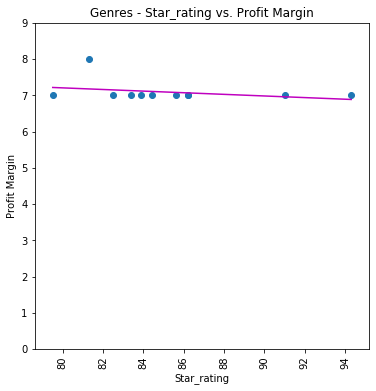

In [48]:
# use visualization to display which genres have the highest star_rating
# regression analysis 
x_values = genre_movie_grouping["profit_margin"]
y_values = genre_movie_grouping["star_rating"]
# conduct a linear regression on star_rating vs. profit 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# get regression values
regress_values = x_values * slope + intercept
# line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# plot
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x_values,regress_values,"m-")
ax.scatter(x_values,y_values)
ax.set_xlabel(f"Star_rating")
ax.set_ylabel(f'Profit Margin')
ax.set_yticks(np.arange(0,10,1))
ax.set_xticklabels(x_values, rotation='vertical')
ax.set_yticklabels(y_values)
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
ax.xaxis.set_major_formatter(tick)
ax.set_title(f'Genres - Star_rating vs. Profit Margin',fontsize=12)
print(f"The r-squared is: {rvalue}")

plt.show()

# The movie ratings show a negative relationship , but I wanted to make a comparison to show that:

Crime genre consists of 10.5% movies based on our sample, but has highest ratings(eg. The Shawshank Redemption),
followed by Action and Comedy.  However, our genre and financial anaysis show that crime movies have lower budgets and revenue and the lowest profit margin, as such, there is a negative relationship between star_rating and profit margin.